In [1]:
#importujem potrebné knižnice
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
#importujem potrebné knižnice
import pandas as pd
from keras.utils import np_utils
from keras.utils import to_categorical
from matplotlib import pyplot as plt

In [3]:
# zo stránky kaggle stiahol som dataset, a umiestnil som ho do svojho miestneho pracovného adresára
# tu načítam do mojho projectu a vypísem prvé päť riadky
df=pd.read_csv('pd_speech_features.csv')
df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [4]:
#Dáta sa uložia do 2D zoznam, kde prvá dimenzia sú riadky a druhá dimenzia sú stĺpce,
train_X = df.iloc[:,1:755].values
train_Y = df.iloc[:,1].values

In [5]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [6]:
kategoricka_premenna = np_utils.to_categorical(train_Y)

In [7]:
#V tomto príklade použijeme plne prepojenú sieťovú štruktúru s tromi vrstvami.
#Model očakáva riadky údajov s 754 premennými (argument input_dim = 754)
#Prvá skrytá vrstva má 754 uzlov a používa funkciu aktivácie sigmoid.
#Druhá skrytá vrstva má 354 uzlov a používa funkciu aktivácie sigmoid.
#Výstupná vrstva má dva uzlov
model = Sequential()
model.add(Dense(754, input_dim=754, activation='sigmoid'))
model.add(Dense(354, activation='sigmoid'))
model.add(Dense(2))

In [8]:
#Teraz, keď je model definovaný, môžeme ho zostaviť.
#Pri kompilácii musíme špecifikovať niektoré ďalšie vlastnosti, ktoré sa vyžadujú pri školení siete. Pamätajte, 
#že školenie siete znamená nájsť najlepšiu sadu váh na mapovanie vstupov a výstupov v našom súbore údajov.
#Musíme určiť stratovú funkciu, ktorá sa použije na vyhodnotenie množiny váh. Optimalizátor sa používa na vyhľadávanie rôznych váh siete a akýchkoľvek 
#voliteľných metrík, ktoré by sme chceli počas tréningu zhromažďovať a vykazovať.
#Optimalizátor definujeme ako efektívny algoritmus zostupného stochastického gradientu „adam“.
#Nakoniec, pretože ide o problém s klasifikáciou, zhromaždíme a nahlásime presnosť klasifikácie definovanú pomocou argumentu metriky.
model.compile(loss='mean_squared_error', optimizer='adam', metrics = ['accuracy'])
#model.fit(train_X, kategoricka_premenna)
#Môžeme trénovať alebo prispôsobiť náš model na naše načítané údaje tak, že na model zavoláme funkciu fit ().
#Výcvik prebieha počas epoch a každá epocha je rozdelená do skupín.
history = model.fit(train_X, kategoricka_premenna,validation_split = 0.1, epochs=100, batch_size=10, verbose=0)
#Funkcia Evaluation () vráti zoznam s dvoma hodnotami. Prvou bude strata modelu v množine údajov a druhou bude presnosť modelu v množine údajov. 
#Máme záujem iba o nahlásenie presnosti, takže hodnotu straty ignorujeme.
scores = model.evaluate(train_X, kategoricka_premenna,verbose=0)

In [9]:
#Vypíseme presnosť siete
print("\nPresnosť siete %.2f%%" % (scores[1]*100))


Presnosť siete 70.77%


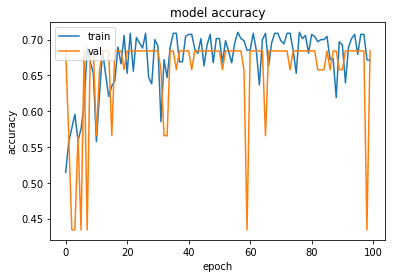

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

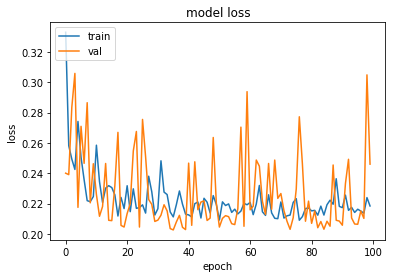

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()